In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [8]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

## normalize

In [9]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x:(x - x.min()) / (x.max()-x.min()))

In [10]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [11]:
import tensorflow as tf

In [12]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [13]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [19]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [18]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10) # num categorical

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

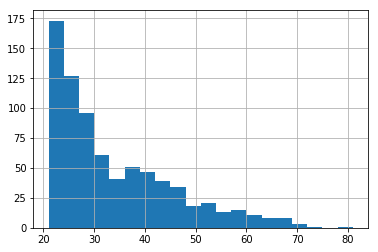

In [21]:
diabetes['Age'].hist(bins=20)

In [23]:
# convert numeric continuous values in categorical
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [24]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [25]:
# TRAIN TESTE SPLIT

In [26]:
x_data = diabetes.drop('Class',axis=1)

In [28]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [29]:
labels = diabetes['Class']

In [30]:
labels

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Class, Length: 768, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [33]:
#labels

In [34]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [35]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff035c5eeb8>, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmp1som97l1', '_master': '', '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_task_type': 'worker'}


In [36]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp1som97l1/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.93147
INFO:tensorflow:global_step/sec: 336.629
INFO:tensorflow:step = 101, loss = 4.04397 (0.299 sec)
INFO:tensorflow:global_step/sec: 393.505
INFO:tensorflow:step = 201, loss = 4.28716 (0.253 sec)
INFO:tensorflow:global_step/sec: 414.875
INFO:tensorflow:step = 301, loss = 6.56806 (0.241 sec)
INFO:tensorflow:global_step/sec: 359.761
INFO:tensorflow:step = 401, loss = 5.69969 (0.277 sec)
INFO:tensorflow:global_step/sec: 367.715
INFO:tensorflow:step = 501, loss = 6.16481 (0.272 sec)
INFO:tensorflow:global_step/sec: 460.908
INFO:tensorflow:step = 601, loss = 6.52058 (0.218 sec)
INFO:tensorflow:global_step/sec: 383.862
INFO:tensorflow:step = 701, loss = 6.35635 (0.259 sec)
INFO:tensorflow:global_step/sec: 397.491
INFO:tensorflow:step = 801, loss = 3.69401 (0.252 sec)
INFO:tensorflow:global_step/sec: 471.11
INFO:tensorflow:step = 901, loss

In [37]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [38]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-12-10:43:41
INFO:tensorflow:Restoring parameters from /tmp/tmp1som97l1/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-12-10:43:41
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.735931, accuracy_baseline = 0.649351, auc = 0.798889, auc_precision_recall = 0.639048, average_loss = 0.527844, global_step = 1000, label/mean = 0.350649, loss = 5.0805, prediction/mean = 0.366229


In [39]:
print(results)

{'loss': 5.0805011, 'accuracy': 0.73593074, 'label/mean': 0.35064936, 'auc_precision_recall': 0.63904768, 'auc': 0.79888892, 'average_loss': 0.52784431, 'accuracy_baseline': 0.64935064, 'prediction/mean': 0.36622947, 'global_step': 1000}


In [40]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,num_epochs=1,shuffle=False)

In [41]:
predictions = model.predict(pred_input_func)

In [42]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmp1som97l1/model.ckpt-1000


In [43]:
my_pred

[{'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.52055073], dtype=float32),
  'logits': array([ 0.08224916], dtype=float32),
  'probabilities': array([ 0.4794493 ,  0.52055073], dtype=float32)},
 {'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.62287378], dtype=float32),
  'logits': array([ 0.50176394], dtype=float32),
  'probabilities': array([ 0.37712622,  0.62287378], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36926049], dtype=float32),
  'logits': array([-0.53539062], dtype=float32),
  'probabilities': array([ 0.63073945,  0.36926046], dtype=float32)},
 {'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.33541745], dtype=float32),
  'logits': array([-0.68378323], dtype=float32),
  'probabilities': array([ 0.66458255,  0.33541742], dtype=float32)},
 {'class_ids': array([0]),
  'classes': arra

In [44]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff024317f60>, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpmzybjlhu', '_master': '', '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_task_type': 'worker'}


In [49]:
# categorical list bucket doenst wotk in dnn change for embedding column
dnn_model.train(input_fn=input_func,steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [50]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [51]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]

In [52]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [54]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_save_checkpoints_steps': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff0240e1fd0>, '_service': None, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpmajqqp9_', '_master': '', '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_tf_random_seed': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_num_worker_replicas': 1, '_task_type': 'worker'}


In [55]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpmajqqp9_/model.ckpt.
INFO:tensorflow:step = 1, loss = 6.70854
INFO:tensorflow:global_step/sec: 312.472
INFO:tensorflow:step = 101, loss = 5.40041 (0.321 sec)
INFO:tensorflow:global_step/sec: 341.006
INFO:tensorflow:step = 201, loss = 5.91052 (0.293 sec)
INFO:tensorflow:global_step/sec: 372.731
INFO:tensorflow:step = 301, loss = 8.55545 (0.268 sec)
INFO:tensorflow:global_step/sec: 336.415
INFO:tensorflow:step = 401, loss = 5.25921 (0.297 sec)
INFO:tensorflow:global_step/sec: 353.192
INFO:tensorflow:step = 501, loss = 4.5122 (0.286 sec)
INFO:tensorflow:global_step/sec: 325.216
INFO:tensorflow:step = 601, loss = 1.97582 (0.305 sec)
INFO:tensorflow:global_step/sec: 436.844
INFO:tensorflow:step = 701, loss = 9.24225 (0.229 sec)
INFO:tensorflow:global_step/sec: 415.464
INFO:tensorflow:step = 801, loss = 8.28972 (0.241 sec)
INFO:tensorflow:global_step/sec: 367.072
INFO:tensorflow:step = 901, loss

In [56]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [57]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-01-12-10:53:03
INFO:tensorflow:Restoring parameters from /tmp/tmpmajqqp9_/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-01-12-10:53:03
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.761905, accuracy_baseline = 0.649351, auc = 0.839959, auc_precision_recall = 0.720324, average_loss = 0.477546, global_step = 1000, label/mean = 0.350649, loss = 4.59638, prediction/mean = 0.396557


{'accuracy': 0.76190478,
 'accuracy_baseline': 0.64935064,
 'auc': 0.83995885,
 'auc_precision_recall': 0.72032392,
 'average_loss': 0.47754627,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 4.5963826,
 'prediction/mean': 0.39655736}